In [1]:
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('nature-images.jpg')

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

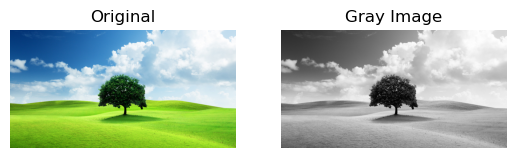

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap="gray")
plt.title("Gray Image")
plt.axis("off")

plt.show()

In [23]:
print(gray)

[[ 42  43  43 ... 214 215 215]
 [ 42  43  43 ... 215 215 215]
 [ 42  43  43 ... 215 215 215]
 ...
 [ 93  96  95 ... 155 152 156]
 [ 93  89  87 ... 167 159 164]
 [ 89  81  69 ... 171 163 162]]


(np.float64(-0.5), np.float64(1199.5), np.float64(629.5), np.float64(-0.5))

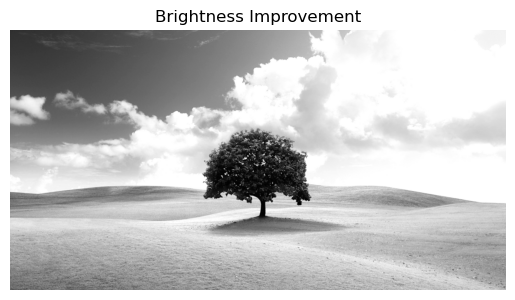

In [5]:
brightened=cv2.add(gray,30)
plt.imshow(brightened,cmap='gray')
plt.title("Brightness Improvement")
plt.axis("off")

In [6]:
print("Matrix shape: " , brightened.shape)

Matrix shape:  (630, 1200)


In [7]:
print(brightened)

[[ 72  73  73 ... 244 245 245]
 [ 72  73  73 ... 245 245 245]
 [ 72  73  73 ... 245 245 245]
 ...
 [123 126 125 ... 185 182 186]
 [123 119 117 ... 197 189 194]
 [119 111  99 ... 201 193 192]]


(np.float64(-0.5), np.float64(1199.5), np.float64(629.5), np.float64(-0.5))

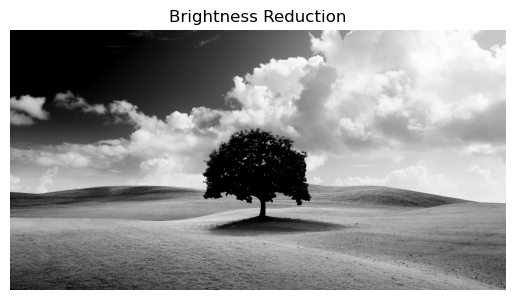

In [8]:
brightness_reduction=cv2.subtract(gray,70)
plt.imshow(brightness_reduction,cmap='gray')
plt.title("Brightness Reduction")
plt.axis("off")

In [9]:
print(brightness_reduction)

[[  0   0   0 ... 144 145 145]
 [  0   0   0 ... 145 145 145]
 [  0   0   0 ... 145 145 145]
 ...
 [ 23  26  25 ...  85  82  86]
 [ 23  19  17 ...  97  89  94]
 [ 19  11   0 ... 101  93  92]]


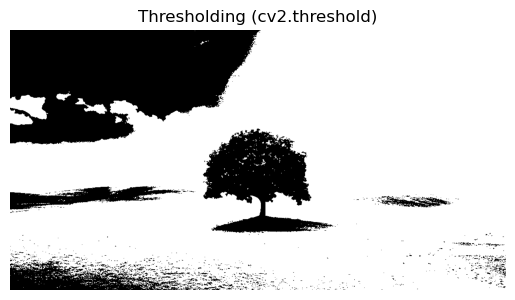

In [10]:
T = 127
_, thresh_img = cv2.threshold(gray, T, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_img,cmap='gray')
plt.title("Thresholding (cv2.threshold)")
plt.axis("off")
plt.show()

In [13]:
print(thresh_img)

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


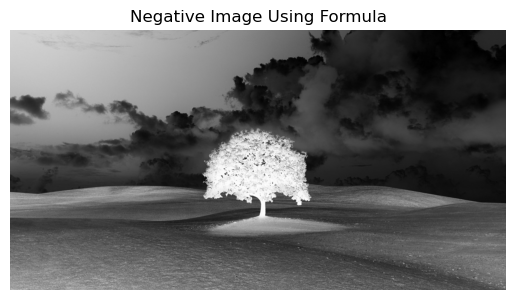

In [11]:
neg_img = 255 - gray 
plt.imshow(neg_img, cmap='gray')
plt.title("Negative Image Using Formula")
plt.axis("off")
plt.show()

In [12]:
print(neg_img)

[[213 212 212 ...  41  40  40]
 [213 212 212 ...  40  40  40]
 [213 212 212 ...  40  40  40]
 ...
 [162 159 160 ... 100 103  99]
 [162 166 168 ...  88  96  91]
 [166 174 186 ...  84  92  93]]


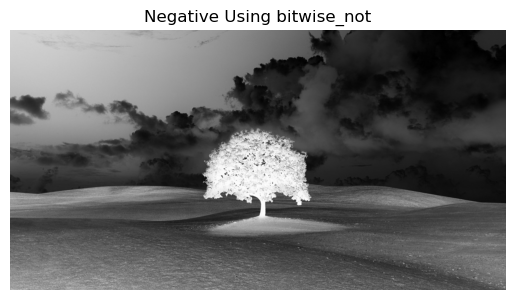

In [22]:
neg_img_cv = cv2.bitwise_not(gray)

plt.imshow(neg_img_cv, cmap='gray')
plt.title("Negative Using bitwise_not")
plt.axis("off")
plt.show()

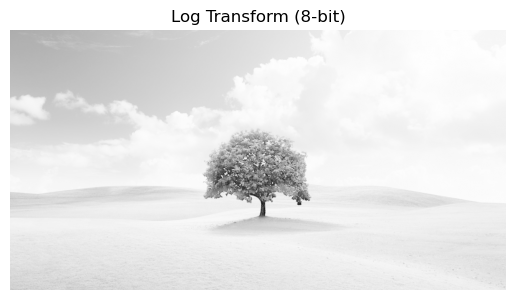

In [19]:
# Convert image to float for log transform
img_float = gray.astype(float)

# Constant for scaling
c = 255 / np.log(1 + np.max(img_float))

# Apply log transformation
log_img_float = c * np.log(1 + img_float)

log_img_uint8 = np.array(log_img_float, dtype=np.uint8)

plt.imshow(log_img_uint8, cmap="gray")
plt.title("Log Transform (8-bit)")
plt.axis("off")
plt.show()

In [20]:
print(log_img_uint8)

[[172 174 174 ... 246 247 247]
 [172 174 174 ... 247 247 247]
 [172 174 174 ... 247 247 247]
 ...
 [208 210 209 ... 232 231 232]
 [208 206 205 ... 235 233 234]
 [206 202 195 ... 236 234 234]]


(np.float64(-0.5), np.float64(1199.5), np.float64(629.5), np.float64(-0.5))

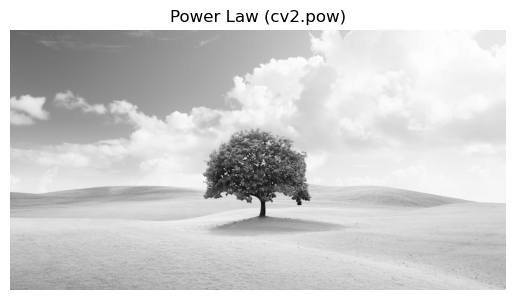

In [15]:
gamma = 0.5

# Convert to float [0,1]
img_float = gray.astype(np.float32) / 255.0

# Apply gamma correction
power_law = cv2.pow(img_float, gamma)

# Convert back to [0,255]
power_law = np.uint8(power_law * 255)

plt.imshow(power_law, cmap='gray')
plt.title("Power Law (cv2.pow)")
plt.axis("off")

In [16]:
print(power_law)

[[103 104 104 ... 233 234 234]
 [103 104 104 ... 234 234 234]
 [103 104 104 ... 234 234 234]
 ...
 [153 156 155 ... 198 196 199]
 [153 150 148 ... 206 201 204]
 [150 143 132 ... 208 203 203]]
